<a href="https://colab.research.google.com/github/BearLeg24/KB-smishing/blob/master/Model_Testbed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/BearLeg24/KB-smishing.git

Cloning into 'KB-smishing'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 152 (delta 20), reused 0 (delta 0), pack-reused 90
Receiving objects: 100% (152/152), 45.36 MiB | 2.77 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [3]:
import pandas as pd 
import numpy as np 
import numpy as np
import tensorflow as tf
import random
import pickle
import datetime

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import *
from keras.losses import MSE
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## 데이터불러오기

In [6]:
#@title 파일이름, 데이터 셋 설정
#@markdown ###시작전에 채우기
#@markdown 모델의 이름#
MODEL_NAME = "attention_v1" #@param {type:"string"}

#@markdown 작성자 이니셜#
WRITER = 'ug' #@param {type:"string"}

#@markdown 훈련 데이터셋 선택#
TRAINSET = "mecab_morphs_imbalance_train.pickle"  #@param ['mecab_morphs_imbalance_train.pickle', 'mecab_nouns_balance_train.pickle', 'mecab_nouns_imbalance_train.pickle']

#@markdown 테스트 데이터셋 선택#
TESTSET1 = "mecab_morphs_balance_test.pickle" #@param ['mecab_morphs_balance_test.pickle','mecab_morphs_imbalance_test.pickle', 'mecab_nouns_balance_test.pickle', 'mecab_nouns_imbalance_test.pickle']
TESTSET2 = "mecab_morphs_imbalance_test.pickle" #@param ['mecab_morphs_balance_test.pickle','mecab_morphs_imbalance_test.pickle', 'mecab_nouns_balance_test.pickle', 'mecab_nouns_imbalance_test.pickle']

#@markdown 제출용 테스트 데이터셋 선택#
SUBMISSIONSET = "mecab_morphs_public_test.pickle" #@param ['mecab_morphs_public_test.pickle', 'mecab_nouns_public_test.pickle']

#@markdown ---

now = datetime.datetime.now()
nowDate = now.strftime('%Y-%m-%d').replace('-','')
SAVE_FILE_NAME = nowDate + "_" + WRITER + "_" + MODEL_NAME
# 세이브파일 이름
print("세이브 파일 이름 : "+SAVE_FILE_NAME)

세이브 파일 이름 : 20191226_ug_attention_v1


In [5]:
DATA_PATH = '/content/KB-smishing/Token_data/'

# 트레인 데이터
TRAIN_DATA_PATH = DATA_PATH + TRAINSET
train_data = []

# 테스트셋1
TEST1_DATA_PATH = DATA_PATH + TESTSET1
test1_data = []

# 테스트셋2
TEST2_DATA_PATH = DATA_PATH + TESTSET2
test2_data = []

# 제출용 테스트 데이터
SUBMIT_DATA_PATH = DATA_PATH + SUBMISSIONSET
submit_data = []

# 전체 데이터의 워드사전
FREQ_DICT_PATH = DATA_PATH + 'frequency_' + TRAINSET.split('_')[1] + '_token_data.pickle'
freq_data = {} 

with open(TRAIN_DATA_PATH, 'rb') as f:
  train_data = pickle.load(f)

with open(TEST1_DATA_PATH, 'rb') as f:
  test1_data = pickle.load(f)

with open(TEST2_DATA_PATH, 'rb') as f:
  test2_data = pickle.load(f)

with open(SUBMIT_DATA_PATH, 'rb') as f:
  submit_data = pickle.load(f)
  submit_data = list(submit_data['text'])

with open(FREQ_DICT_PATH, 'rb') as f:
  freq_data = pickle.load(f)

label_data = list(train_data['label'])
train_data = list(train_data['text'])

print(len(train_data))
print(train_data[0:10])

print(len(label_data))
print(label_data[0:10])

print(len(submit_data))
print(submit_data[0:10])


# MAX_LEN은 한문장이 가지는 토큰의 최대 수(Embbeding 레이어의 length로 사용)
MAX_LEN = 0
for i in train_data:
  if MAX_LEN < len(i):
    MAX_LEN = len(i)
print(MAX_LEN)

14000
[['고객', '님', '안녕', '하', '세요', '은행', '사가정역', '지점', '과장', '입니다', '화창', '한', '하늘', '에', '기분', '좋', '일', '생길', '것', '같', '화요일', '입니다', '무더워', '진', '날씨', '에', '건강', '관리', '잘', '하', '시', '구요', '언제나', '거래', '해', '주', '셔서', '너무', '감사', '드립니다', '은행', '사가정역', '지점', '과장', '올림'], ['고객', '님', '안녕', '하', '세요', '신중', '동역', '대리', '입니다', '어제', '처리', '해', '드린', '업무', '이상', '없', '으셨는지', '안부', '문자', '드려요', '궁금', '하', '신', '사항', '있', '으시', '면', '언제', '든', '대리', '찾', '아', '주', '시', '구요', '부족', '하', '지만', '전화', '받', '으시', '면', '우수', '직원', '추천', '부탁드릴께요', '그럼', '오늘', '하루', '도', '행복', '가득', '하', '세요', '신중동', '올림'], ['편안', '함', '과', '재충전', '속', '에', '행복', '한', '저녁', '되', '세요', '은행', '올림'], ['고객', '님', '출근', '하', '며', '이른', '아침', '추위', '이겨', '내', '며', '운동', '하', '시', '분', '봤', '어요', '참', '열심히', '사', '시', '구나', '생각', '하', '며', '힘', '얻', '으며', '출근', '했', '어요', '1', '월', '정든', '직원', '들', '고', '새로운', '직원', '들', '로', '바뀌', '면서', '어떻게', '지나간지', '도', '모르', '게', '지나갔', '어요', '새로운', '2', '월', '맞', '아', '직원', '들', '

## 토큰 빈도, 단어 딕셔너리 생성

In [0]:
# 토큰 빈도수 딕셔너리
frequency_token_data = freq_data

#================================================================
# PAD는 패딩처리 UNK은 딕셔너리에 없는 word처리
word2index = {k : i+2 for i,k in enumerate(frequency_token_data)}
word2index['PAD'] = 0
word2index['UNK'] = 1

#================================================================
index2word ={v:k for k, v in word2index.items()}

print(frequency_token_data)
print(word2index)
print(index2word)
print(len(frequency_token_data))
print(len(word2index))


{'행성': 768, '산': 7761, '팀장': 33382, '입니다': 107529, '행복': 109391, '한': 309843, '주말': 53288, '되': 190842, '세요': 213021, '오늘': 52870, '도': 152236, '많': 54015, '웃': 8922, '으시': 36066, '하루': 66689, '시작': 19362, '하': 522225, '행': 238073, '진월동': 36, 'VIP': 10475, '라운지': 3099, '올림': 182882, '안녕': 55514, '십니까': 14009, '고객': 265583, '님': 232991, '금일': 3149, '납부': 7602, '셔야': 2446, '할': 32842, '금액': 19748, '원': 86262, '감사': 145641, '합니다': 146886, '새해': 10985, '복': 5484, '받': 50164, '으십시오': 1463, '옥포': 1068, '지점': 111189, '지난': 2078, '해': 160974, '동안': 4979, '저희': 52025, '에': 254836, '보내': 90111, '주': 222035, '신': 51225, '성원': 4086, '드립니다': 135263, '설렘': 1554, '으로': 173896, '2017': 22500, '년': 49573, '소망': 4123, '시': 326501, '일': 90160, '모두': 11882, '의': 235602, '정': 6736, '늘': 14636, '건강': 38304, '과': 89518, '함께': 21780, '길': 63024, '기원': 16402, '겠': 102588, '습니다': 192426, '사랑': 22919, '족': 9193, '나누': 3988, '설': 1921, '명절': 5669, '직원': 35910, '일동': 2568, '1': 107264, '월': 94485, '새로움': 101, '득':

In [0]:
def data_indexing(train_data, label_data, MAX_LEN):
  x = np.empty((len(train_data), ), dtype=list)
  y = np.array(label_data, dtype=np.float64)
  cnt = 0
  for i in train_data:
    seq = []
    for word in i:
      if word in word2index:
        seq.append(word2index[word])
      else:
        seq.append(word2index["UNK"])
    x[cnt] = seq
    cnt += 1
  x = sequence.pad_sequences(x, maxlen=MAX_LEN)
  return x,y



## 데이터 인덱싱

In [0]:
x_train, y_train = data_indexing(train_data, label_data, MAX_LEN)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


## 모델 빌드

In [0]:
def LSTM_Model(embed_size = 10, hidden_size = 100, vocab_size = len(word2index), lr = 0.001):
  model = Sequential()
  model.add(Embedding(vocab_size, embed_size, input_length=MAX_LEN))
  model.add(LSTM(hidden_size, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=tf.train.AdamOptimizer(learning_rate = lr), loss='MSE', metrics=['acc'])
  model.summary()
  return model


VOCAB_SIZE = len(word2index)
EMBEDDING_SIZE = 12
HIDDEN_LAYER_SIZE = 100
BATCH_SIZE = 50
NUM_EPOCHS = 10
LEARNING_RATE = 0.001

  
model = LSTM_Model(
    embed_size= EMBEDDING_SIZE,
    hidden_size = HIDDEN_LAYER_SIZE,
    vocab_size = VOCAB_SIZE,
    lr = LEARNING_RATE
    )

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 493, 12)           196416    
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               45200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 241,717
Trainable params: 241,717
Non-trainable params: 0
_________________________________________________________________


## 모델 학습과 저장

In [0]:
cd /content/drive/My Drive/KB_Smishing공모전

/content/drive/My Drive/KB_Smishing공모전


In [0]:
model_path = SAVE_FILE_NAME + ".ckpt"
# 체크포인트 기능 써서 가장 높은 정확도일때를 저장 (재량껏)
checkpoint = ModelCheckpoint(
    filepath=model_path,
    monitor='val_loss',
    verbose=1,
     save_best_only=True
     )

# 트레이닝
model.fit(
    x_train, 
    y_train,
    batch_size = BATCH_SIZE,
    validation_split = 0.3,
    epochs = NUM_EPOCHS,
    callbacks=[checkpoint]
    )


#model save (공유폴더에 저장)
model_json = model.to_json()
with open(SAVE_FILE_NAME + ".json", "w") as json_file : 
    json_file.write(model_json)

#model weight save
model.save_weights(SAVE_FILE_NAME + ".h5")
print("Saved model to disk")


Train on 9800 samples, validate on 4200 samples
Epoch 1/10
9800/9800 [==============================] - 184s 19ms/step - loss: 0.0702 - acc: 0.9345 - val_loss: 0.0595 - val_acc: 0.9333

Epoch 00001: val_loss improved from inf to 0.05953, saving model to 20191225_ug_model_v1.ckpt


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:135: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/10
9800/9800 [==============================] - 182s 19ms/step - loss: 0.0189 - acc: 0.9767 - val_loss: 0.0022 - val_acc: 0.9983

Epoch 00002: val_loss improved from 0.05953 to 0.00221, saving model to 20191225_ug_model_v1.ckpt
Epoch 3/10
9800/9800 [==============================] - 183s 19ms/step - loss: 0.0012 - acc: 0.9989 - val_loss: 9.5177e-04 - val_acc: 0.9990

Epoch 00003: val_loss improved from 0.00221 to 0.00095, saving model to 20191225_ug_model_v1.ckpt
Epoch 4/10
9800/9800 [==============================] - 182s 19ms/step - loss: 0.0016 - acc: 0.9987 - val_loss: 0.0080 - val_acc: 0.9907

Epoch 00004: val_loss did not improve from 0.00095
Epoch 5/10
9800/9800 [==============================] - 183s 19ms/step - loss: 0.0030 - acc: 0.9973 - val_loss: 5.2548e-04 - val_acc: 0.9995

Epoch 00005: val_loss improved from 0.00095 to 0.00053, saving model to 20191225_ug_model_v1.ckpt
Epoch 6/10
9800/9800 [==============================] - 182s 19ms/step - loss: 6.5322e-04 - acc

## 저장된 모델불러오기

In [0]:
# from keras.models import model_from_json 

# json_file = open(SAVE_FILE_NAME + ".json", "r")
# loaded_model_json = json_file.read()
# model = model_from_json(loaded_model_json)

# #model weight load
# model.load_weights(SAVE_FILE_NAME + ".h5")
# print("Loaded model from disk")

# #model load and evaluation
# #유의할 점은 model load 후 다시 compile을 해야 한다는 점이다.
# model.compile(optimizer=tf.train.AdamOptimizer(learning_rate = LEARNING_RATE), loss='MSE', metrics=['acc'])

## 모델평가 Testset1, Testset2, ROC곡선

In [0]:
print(test1_data.head(4))
print(test1_data.shape)
xtest1, ytest1 = data_indexing(list(test1_data['text']), list(test1_data['label']), MAX_LEN)

print(test2_data.head(4))
print(test2_data.shape)
xtest2, ytest2 = data_indexing(list(test2_data['text']), list(test2_data['label']), MAX_LEN)


# test1
score1, acc1 = model.evaluate(xtest1, ytest1, batch_size= len(test1_data))
print("Testset#1 score : {}, accuracy: {}\n".format(score1, acc1))

# test2
score2, acc2 = model.evaluate(xtest2, ytest2, batch_size= len(test2_data))
print("Testset#2 score : {}, accuracy: {}\n".format(score2, acc2))


# test1 학습
model.fit(
    xtest1, 
    ytest1,
    batch_size = BATCH_SIZE * 2,
    validation_split = 0.2,
    epochs = NUM_EPOCHS // 3
    )

score1, acc1 = model.evaluate(xtest1, ytest1, batch_size= len(test1_data))
print("Testset#1 score : {}, accuracy: {}\n".format(score1, acc1))

# test2 학습
model.fit(
    xtest2, 
    ytest2,
    batch_size = BATCH_SIZE * 2,
    validation_split = 0.2,
    epochs = NUM_EPOCHS // 3    
    )

score2, acc2 = model.evaluate(xtest2, ytest2, batch_size= len(test2_data))
print("Testset#2 score : {}, accuracy: {}\n".format(score2, acc2))


                                                text  label
0  [고객, 님, 어제, 업무, 처리, 도와, 드린, 은행, 호평, 동지점, 차장, 입...      0
1  [광고, Korea, 비싼, 이자, 전환, 하, 고자, 하, 시, 분, 적금, 및,...      1
2  [쉬, 고, 있, 세포, 깨우, 고, 싶, 지, 않, 으신, 가요, 많이, 웃, 으...      0
3  [고객, 님, 의, 행복, 최우선, 으로, 하, 겠, 습니다, 편안, 한, 저녁, ...      0
(6000, 2)
                                                text  label
0  [가정, 의, 달, 5, 월, 의, 연휴, 가족, 분, 들, 과, 행복, 하, 게,...      0
1  [고객, 님, 은행, 서, 점, 부, 지점장, 입니다, 고객, 님, 의, 소중, 한...      0
2  [고객, 님, 여름, 시작, 되, 6, 월, 입니다, 날씨, 도, 더워, 지, 기,...      0
3  [광고, 고객, 님, 안녕, 하, 십니까, 세액, 공제, 혜택, 가능, 한, 유익,...      0
(6000, 2)
6000/6000 [==============================] - 0s 67us/step
Testset#1 score : 0.002226543612778187, accuracy: 0.9973333477973938

6000/6000 [==============================] - 0s 67us/step
Testset#2 score : 0.001398955937474966, accuracy: 0.9990000128746033

Train on 4800 samples, validate on 1200 samples
Epoch 1/3
4800/4800 [==============================] - 42s 9ms/step - loss: 

이놈의 AUC값은?  0.9999622754635591


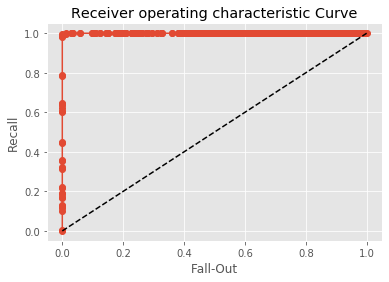

In [0]:
from sklearn.metrics import roc_curve # 모델 성능 확인
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')

pred_val = model.predict(xtest2)

#AUC계산을 위한 fpr, tpr 계산
fpr, tpr, thresholds = roc_curve(ytest2, pred_val)

#AUC계산
print('이놈의 AUC값은? ',auc(fpr, tpr))

#ROC커브 플로팅
plt.plot(fpr, tpr, 'o-', label="LSTM")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
# plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic Curve')
plt.show()

## 모델평가(제출용)


In [0]:
submit_indexing, _ = data_indexing(submit_data, None, MAX_LEN)
print(submit_indexing.shape)
submit_label = model.predict(submit_indexing)
print(submit_indexing.shape)

submission = pd.read_csv("submission_제출양식.csv") 
submission['smishing'] = submit_label
print(submission.head(20)) 
submission.to_csv(SAVE_FILE_NAME+"submission.csv",index=False) 

(1626, 493)
(1626, 493)
        id  smishing
0   340000  0.000043
1   340001  0.003550
2   340002  0.000094
3   340003  0.000028
4   340004  0.000036
5   340005  0.000055
6   340006  0.001078
7   340007  0.002222
8   340008  0.000076
9   340009  0.000081
10  340010  0.003290
11  340011  0.000100
12  340012  0.001119
13  340013  0.000181
14  340014  0.001199
15  340015  0.009081
16  340016  0.002382
17  340017  0.000044
18  340018  0.002966
19  340019  0.000121


In [0]:
label = np.round(submit_label)
distance = np.sqrt((label - submit_label)**2)
print(1 - np.mean(distance))
# score 차이남 (0.86 -> 0.91(실재))
# (0.932 -> 0.92(실재))

0.9322812482714653
